In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, max_error
import matplotlib.pyplot as plt

# Reading data

In [2]:
df = pd.read_csv("dataset_random_18k.csv")

In [3]:
df.head()

,Unnamed: 0,Enrichment,FuelTemperature,WaterTemperature,Pitch,FuelRadius,WaterDensity,Keff,Std_dev
0,0,1.33,1500.0,429.426380,1.989,0.639,0.919,1.13121,0.00035
1,1,7.50,1022.8,440.093968,1.939,0.741,0.909,1.44104,0.00040
2,2,5.14,353.4,348.854867,1.384,0.581,0.981,1.29719,0.00045
3,3,7.54,717.7,330.850967,1.642,0.519,0.991,1.56388,0.00041
4,4,1.68,1166.0,407.411055,1.008,0.204,0.939,1.05865,0.00036


In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,Enrichment,FuelTemperature,WaterTemperature,Pitch,FuelRadius,WaterDensity,Keff,Std_dev
0,1.33,1500.0,429.426380,1.989,0.639,0.919,1.13121,0.00035
1,7.50,1022.8,440.093968,1.939,0.741,0.909,1.44104,0.00040
2,5.14,353.4,348.854867,1.384,0.581,0.981,1.29719,0.00045
3,7.54,717.7,330.850967,1.642,0.519,0.991,1.56388,0.00041
4,1.68,1166.0,407.411055,1.008,0.204,0.939,1.05865,0.00036
...,...,...,...,...,...,...,...,...
18081,5.56,488.4,339.837155,1.065,0.325,0.986,1.51146,0.00045
18082,5.48,1602.6,580.765243,1.669,0.749,0.709,1.10691,0.00043
18083,7.23,1656.6,501.660030,1.330,0.449,0.840,1.45195,0.00039
18084,6.96,1038.0,369.320282,1.172,0.511,0.968,1.21955,0.00037


In [5]:
df.describe()

,Enrichment,FuelTemperature,WaterTemperature,Pitch,FuelRadius,WaterDensity,Keff,Std_dev
count,18086.000000,18086.000000,18086.000000,18086.000000,18086.000000,18086.000000,18086.000000,18086.000000
mean,4.990335,1122.321619,444.603625,1.497257,0.472838,0.885416,1.354016,0.000398
std,2.300221,394.176216,86.525787,0.291036,0.153357,0.094512,0.171434,0.000034
min,1.000000,303.000000,300.001120,1.000000,0.200000,0.660000,0.568560,0.000240
25%,2.990000,788.550000,369.314983,1.244000,0.355000,0.818000,1.238733,0.000380
50%,4.980000,1125.450000,441.597679,1.496000,0.449000,0.908000,1.377630,0.000400
75%,6.960000,1461.175000,518.249645,1.748000,0.574000,0.968000,1.494355,0.000420
max,9.000000,1799.900000,599.945361,2.000000,0.899000,1.003000,1.633880,0.000520


In [6]:
df.corr()

,Enrichment,FuelTemperature,WaterTemperature,Pitch,FuelRadius,WaterDensity,Keff,Std_dev
Enrichment,1.000000,-0.006703,-0.003645,-0.004564,-0.003858,0.003986,0.712426,-0.113872
FuelTemperature,-0.006703,1.000000,0.100505,0.001280,-0.006048,-0.098156,-0.061140,0.040541
WaterTemperature,-0.003645,0.100505,1.000000,-0.000430,-0.000444,-0.979228,-0.081932,0.033506
Pitch,-0.004564,0.001280,-0.000430,1.000000,0.560433,0.002163,0.046329,-0.088317
FuelRadius,-0.003858,-0.006048,-0.000444,0.560433,1.000000,0.000297,-0.273000,0.245987
WaterDensity,0.003986,-0.098156,-0.979228,0.002163,0.000297,1.000000,0.084272,-0.034767
Keff,0.712426,-0.061140,-0.081932,0.046329,-0.273000,0.084272,1.000000,-0.114673
Std_dev,-0.113872,0.040541,0.033506,-0.088317,0.245987,-0.034767,-0.114673,1.000000


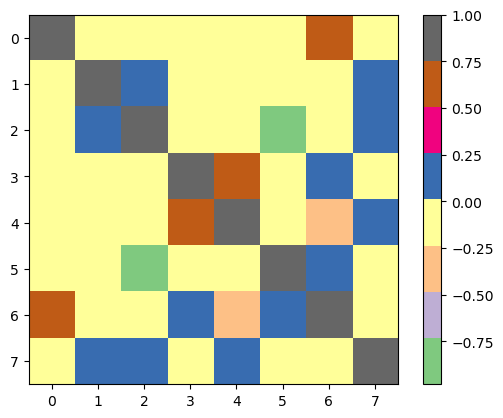

In [7]:
im = plt.imshow(df.corr(), cmap='Accent')
plt.colorbar(im)
plt.show()

# Feature engineering

Picture of the PWR cell's model used for the generation of the data set is presented below.

<p style="text-align:center;"><img src="model_pwr_cell.png" width="500" alt="Alternative text" /></p>

$a$ is the pitch of the cell, cm

$R_f$ is the fuel radius, cm

$d$ is the thickness of the cladding, cm

$Enrichment$ is the enrichment of the fuel by U235 isotope, percents (weight)

$T_{water}$ is the temperature of the water (moderator), K

$T_{fuel}$ is the temperature of the fuel, K

$\rho_{water}$ is the density of the water, g/cm3

We can give a "hint" for ML model combining the data from the dataset in different ways. In this problem we can use well knnown from reactor physics ratio $V_m/V_f$ where $V_m$ is the volume of the moderator and $V_f$ is the voulume of the fuel. Our current model is 2D model. Therefore, $V_m/V_f$ ratio will be equal to ratios of the areas, i.e. $V_m = a^2 - \pi R_c^2$, where $a$ is the pitch of the cell, $R_c^2$ is the radius of the cladding ($R_c$ is equal $R_f + d$). The volume of the fuel is $\pi R_f^2$. The final equation will be given by $\frac{V_m}{V_f} = \frac{a^2 - \pi (R_f+d)^2}{\pi R_f^2}$

In [8]:
df['vmvf'] = (df['Pitch'] * df['Pitch'] / (np.pi * df['FuelRadius'] * df['FuelRadius'])) - 1 - (0.12 / df['FuelRadius']) - (0.0036 / (df['FuelRadius'] * df['FuelRadius']))
df

,Enrichment,FuelTemperature,WaterTemperature,Pitch,FuelRadius,WaterDensity,Keff,Std_dev,vmvf
0,1.33,1500.0,429.426380,1.989,0.639,0.919,1.13121,0.00035,1.887416
1,7.50,1022.8,440.093968,1.939,0.741,0.909,1.44104,0.00040,1.011063
2,5.14,353.4,348.854867,1.384,0.581,0.981,1.29719,0.00045,0.589012
3,7.54,717.7,330.850967,1.642,0.519,0.991,1.56388,0.00041,1.941538
4,1.68,1166.0,407.411055,1.008,0.204,0.939,1.05865,0.00036,6.096867
...,...,...,...,...,...,...,...,...,...
18081,5.56,488.4,339.837155,1.065,0.325,0.986,1.51146,0.00045,2.014770
18082,5.48,1602.6,580.765243,1.669,0.749,0.709,1.10691,0.00043,0.413886
18083,7.23,1656.6,501.660030,1.330,0.449,0.840,1.45195,0.00039,1.507817
18084,6.96,1038.0,369.320282,1.172,0.511,0.968,1.21955,0.00037,0.425796


In [9]:
features = df.drop(['Keff', 'Std_dev', 'WaterDensity'], axis=1)
labels = df['Keff']

In [10]:
features

,Enrichment,FuelTemperature,WaterTemperature,Pitch,FuelRadius,vmvf
0,1.33,1500.0,429.426380,1.989,0.639,1.887416
1,7.50,1022.8,440.093968,1.939,0.741,1.011063
2,5.14,353.4,348.854867,1.384,0.581,0.589012
3,7.54,717.7,330.850967,1.642,0.519,1.941538
4,1.68,1166.0,407.411055,1.008,0.204,6.096867
...,...,...,...,...,...,...
18081,5.56,488.4,339.837155,1.065,0.325,2.014770
18082,5.48,1602.6,580.765243,1.669,0.749,0.413886
18083,7.23,1656.6,501.660030,1.330,0.449,1.507817
18084,6.96,1038.0,369.320282,1.172,0.511,0.425796


In [11]:
labels

0        1.13121
1        1.44104
2        1.29719
3        1.56388
4        1.05865
          ...   
18081    1.51146
18082    1.10691
18083    1.45195
18084    1.21955
18085    1.40361
Name: Keff, Length: 18086, dtype: float64

In [13]:
x_train, x_val, y_train, y_val = train_test_split(features, labels, test_size=0.2)

In [14]:
y_train

11077    1.43429
13282    1.52729
2350     1.33503
1192     1.22095
6899     1.55948
          ...   
5766     1.57741
16949    0.94739
17893    1.29899
6693     1.16602
16685    1.35024
Name: Keff, Length: 14468, dtype: float64

In [16]:
model = MLPRegressor(hidden_layer_sizes=(20, ), 
                     activation='tanh', 
                     batch_size=64, 
                     learning_rate='constant', 
                     learning_rate_init=2e-5, 
                     early_stopping=True,
                     validation_fraction=0.1,
                     tol=1e-5, 
                     verbose=True, 
                     n_iter_no_change=100, 
                     max_iter=50000)
X = x_train.values
y = y_train.values
model.fit(X, y)

Iteration 1, loss = 2.03464297
Validation score: -130.281810
Iteration 2, loss = 1.80008245
Validation score: -114.579333
Iteration 3, loss = 1.58249065
Validation score: -100.624020
Iteration 4, loss = 1.37668546
Validation score: -87.349900
Iteration 5, loss = 1.18502676
Validation score: -74.186538
Iteration 6, loss = 0.99972192
Validation score: -61.165810
Iteration 7, loss = 0.81590354
Validation score: -48.767981
Iteration 8, loss = 0.64514340
Validation score: -39.185470
Iteration 9, loss = 0.52188054
Validation score: -31.985849
Iteration 10, loss = 0.43218038
Validation score: -26.785622
Iteration 11, loss = 0.36120079
Validation score: -22.185714
Iteration 12, loss = 0.30511827
Validation score: -18.731392
Iteration 13, loss = 0.26278876
Validation score: -15.925834
Iteration 14, loss = 0.22706493
Validation score: -13.582643
Iteration 15, loss = 0.19687940
Validation score: -11.616893
Iteration 16, loss = 0.17059808
Validation score: -9.947928
Iteration 17, loss = 0.14899722

MLPRegressor(activation='tanh', batch_size=64, early_stopping=True,
             hidden_layer_sizes=(20,), learning_rate_init=2e-05, max_iter=50000,
             n_iter_no_change=100, tol=1e-05, verbose=True)

In [17]:
model.loss_

3.8511388617040096e-05

In [18]:
y_predict = model.predict(x_val.values)

In [19]:
y_val.values

array([1.39559, 1.27599, 1.32153, ..., 0.91675, 1.44636, 1.56452])

In [20]:
y_predict

array([1.39993843, 1.2873567 , 1.3167711 , ..., 0.91985938, 1.45139301,
       1.55430451])

In [21]:
r_squared = model.score(x_val.values, y_val.values)
test_set_rmse = np.sqrt(mean_squared_error(y_val.values, y_predict))
test_mae = mean_absolute_error(y_predict, y_val.values)
print("r_squared = ", r_squared)
print("RMSE = ", test_set_rmse)
print("MAE = ", test_mae)
print("MAE_PERCENTAGE = ", mean_absolute_percentage_error(y_val.values, y_predict) * 100000)
print("MAX_ERROR = ", max_error(y_val.values, y_predict)*100000.)

r_squared =  0.9976919130980431
RMSE =  0.008074592208662894
MAE =  0.005340170211464897
MAE_PERCENTAGE =  418.5259988431738
MAX_ERROR =  14020.369329095072


Varying fuel radius

In [22]:
enr = 4.5
pitch = 1.26
wt = 300.
ft = 300.
wd = 1.
radii = np.arange(0.25, 0.56, 0.01)
x_in = []
for fr in radii:
    vmvf = (pitch * pitch / (np.pi * fr * fr)) - 1 - (0.12 / fr) - (0.0036 / (fr * fr))    
    x_in.append([enr, ft, wt, pitch, fr, vmvf])
x_in = np.array(x_in)
y_out = model.predict(x_in)
x_in.shape
y_out

array([1.42646461, 1.44171982, 1.45547188, 1.4676304 , 1.47811319,
       1.48688315, 1.49395245, 1.49936932, 1.50319912, 1.5055069 ,
       1.50634449, 1.50574307, 1.5037106 , 1.50023337, 1.4952804 ,
       1.48881003, 1.48077738, 1.4711423 , 1.45987679, 1.44697144,
       1.43244044, 1.41632475, 1.39869333, 1.37964248, 1.35929346,
       1.33778863, 1.3152867 , 1.29195728, 1.26797537, 1.24351611,
       1.21875001, 1.193839  ])

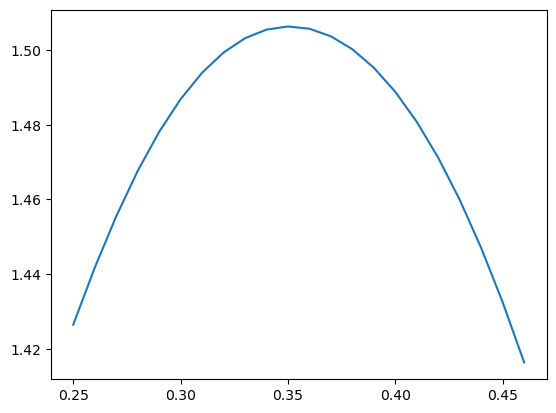

In [23]:
import matplotlib.pyplot as plt
plt.plot(x_in[:22, 4], y_out[:22])